In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import itertools

from src.visualization import plot_similarity
from src.similarity import edges_similarity, nodes_similarity, correlation
from src.algorithms import LocalSearchTSP

In [3]:
def compute_similarity_matrices(solutions):
    sim_matrix_edges = np.full((len(solutions), len(solutions)), np.nan)
    sim_matrix_nodes = np.full((len(solutions), len(solutions)), np.nan)
    for pair in itertools.combinations(np.arange(len(solutions)), 2):
        p1, p2 = solutions[pair[0]][1], solutions[pair[1]][1]
        sim = edges_similarity(p1, p2)
        sim_matrix_edges[pair[0], pair[1]] = sim
        sim_matrix_edges[pair[1], pair[0]] = sim
        sim = nodes_similarity(p1, p2)
        sim_matrix_nodes[pair[0], pair[1]] = sim
        sim_matrix_nodes[pair[1], pair[0]] = sim
    return np.nanmean(sim_matrix_edges, axis=1), np.nanmean(sim_matrix_nodes, axis=1)


def perform_similarity_experiments(node_path, iters=1000):
    greedy_ls = LocalSearchTSP('greedy', node_path, 'edges', 'random')
    all_solutions = []
    similarities = {'avg_edges': [], 'avg_nodes': [], 'best_edges': [], 'best_nodes': []}
    objectives = []
    seed = 841
    np.random.seed(seed)
    best_cost, best_path = np.inf, None
    for _ in range(iters):
        cost, path = greedy_ls.run_algorithm(np.random.randint(200), seed=seed)
        seed += 100
        all_solutions.append([cost, path[:]])
        if cost < best_cost:
            best_cost, best_path = cost, path[:]

    similarities['avg_edges'], similarities['avg_nodes'] = compute_similarity_matrices(all_solutions)
    for i, solution in enumerate(all_solutions):
        cost, path = solution
        similarities['best_edges'].append(edges_similarity(path, best_path))
        similarities['best_nodes'].append(nodes_similarity(path, best_path))
        objectives.append(cost)

    for key in similarities.keys():
        print(key)
        sim = similarities[key]
        plot_similarity(objectives, sim)
        print(f'correlation coefficient: {correlation(objectives, sim)}')
        print('=============================================================================')


# Instance C

avg_edges


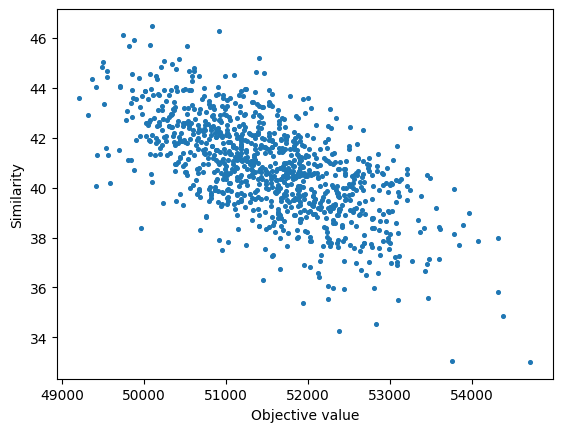

correlation coefficient: [[ 1.         -0.63385839]
 [-0.63385839  1.        ]]
avg_nodes


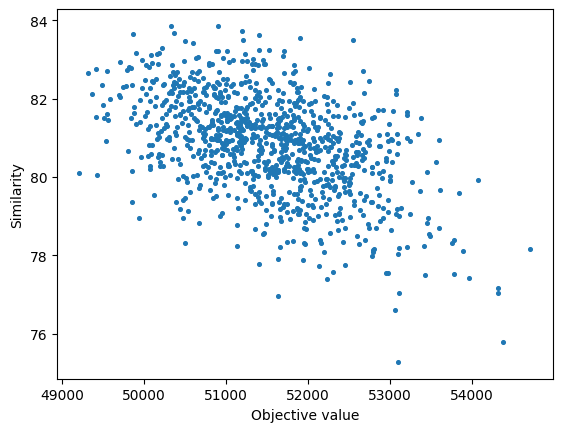

correlation coefficient: [[ 1.         -0.47820371]
 [-0.47820371  1.        ]]
best_edges


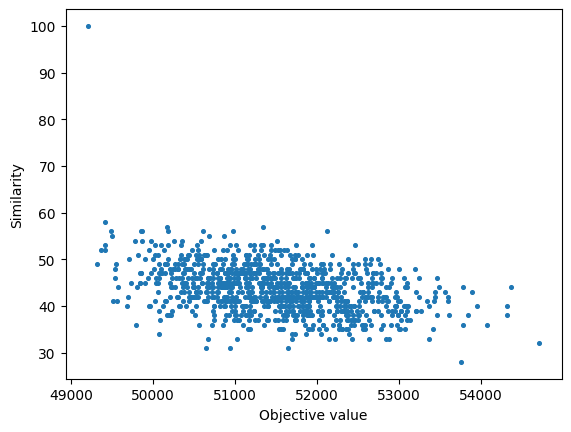

correlation coefficient: [[ 1.         -0.38162876]
 [-0.38162876  1.        ]]
best_nodes


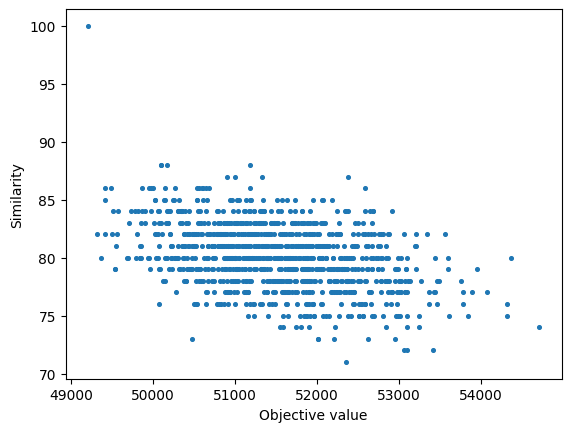

correlation coefficient: [[ 1.        -0.4089045]
 [-0.4089045  1.       ]]


In [4]:
node_path_C = '../data/TSPC.csv'
perform_similarity_experiments(node_path_C, iters=1000)

# Instance D

avg_edges


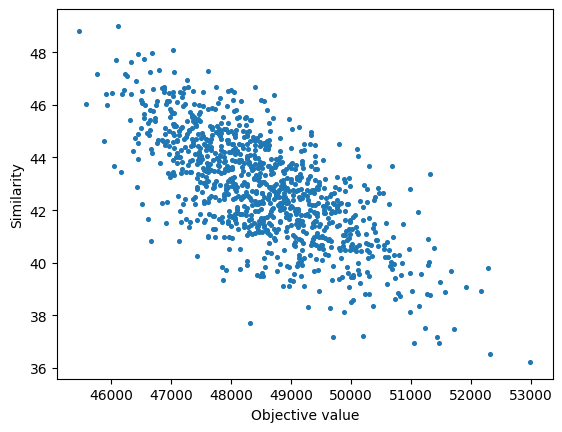

correlation coefficient: [[ 1.         -0.70015847]
 [-0.70015847  1.        ]]
avg_nodes


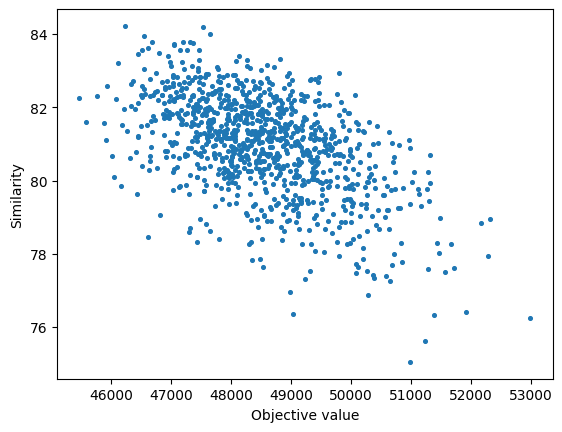

correlation coefficient: [[ 1.         -0.52169151]
 [-0.52169151  1.        ]]
best_edges


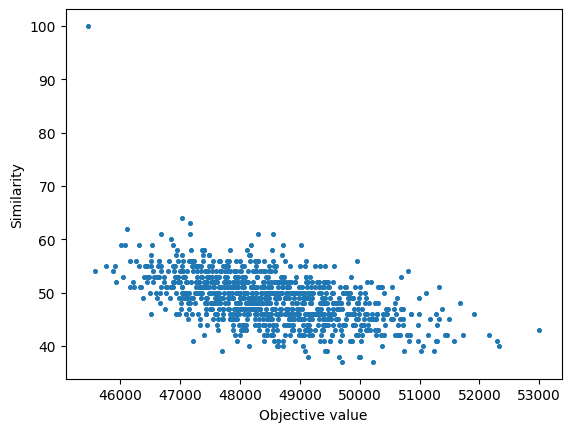

correlation coefficient: [[ 1.         -0.52092869]
 [-0.52092869  1.        ]]
best_nodes


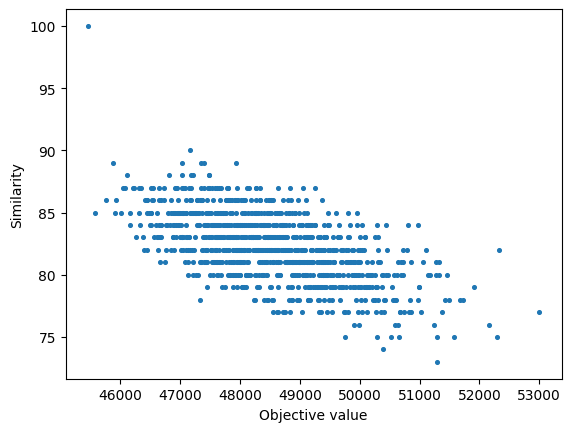

correlation coefficient: [[ 1.         -0.59300467]
 [-0.59300467  1.        ]]


In [5]:
node_path_D = '../data/TSPD.csv'
perform_similarity_experiments(node_path_D, iters=1000)